In [182]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [183]:
import numpy as np
import pandas as pd

**Importing the dataset**

In [184]:
df = pd.read_csv("Social_Network_Ads.csv")

In [185]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [186]:
#first splitting the data set into independent and dependent data
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [187]:
x[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]])

In [188]:
y[:5]

array([0, 0, 0, 0, 0])

In [189]:
#now splittng this dependent and independent data into training and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=None)

In [190]:
x_train[:5]

array([[    44, 139000],
       [    57,  60000],
       [    57,  74000],
       [    24,  84000],
       [    35,  73000]])

In [191]:
y_test[:5]

array([0, 0, 0, 0, 0])

**Feature Scaling**

In [192]:
#scaling only the independent variables as dependent are already in 0 and 1 format(binary)

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [193]:
x_train[:5]

array([[ 0.57241852,  1.97387092],
       [ 1.85395251, -0.37397053],
       [ 1.85395251,  0.04210264],
       [-1.39917224,  0.33929776],
       [-0.31479733,  0.01238313]])

In [194]:
x_test[:5]

array([[-0.80445896, -0.09514345],
       [-0.71547014,  0.70264321],
       [-0.00355955, -0.03604814],
       [ 0.44138456, -0.30197702],
       [ 0.17441809,  0.11169013]])

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [195]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

**Step 3 | Predection**

In [196]:
y_pred=lr.predict(x_test)

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [197]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)

In [198]:
cm

array([[61,  9],
       [ 7, 23]])

84 are correctly predicted whereas 16 are wrong predctions

**Visualization**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


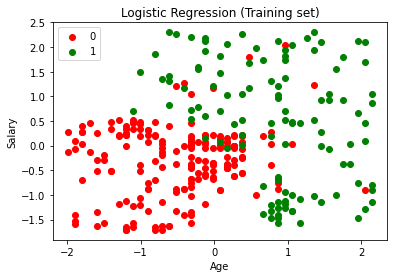

In [213]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap  


for i, j in enumerate(np.unique(y_train)):  
    plt.scatter(x_train[y_train == j, 0], x_train[y_train == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j) 

plt.title('Logistic Regression (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Salary')  
plt.legend()  
plt.show() 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


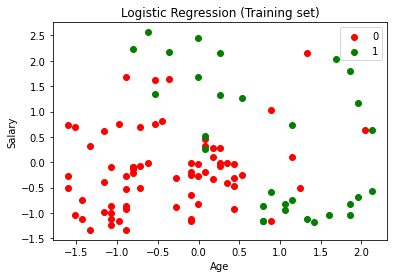

In [214]:
for i, j in enumerate(np.unique(y_test)):  
    plt.scatter(x_test[y_test == j, 0], x_test[y_test == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j) 

plt.title('Logistic Regression (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Salary')  
plt.legend()  
plt.show() 